# Ensembles of Decision Trees

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Random forests


**A random forest is essentially a collection of decision trees, where each tree is slightly different from
the others.**


In [2]:
from helpers.helpers_tree import randomized_tree_interactive
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

randomized_tree_interactive(X,y)

interactive(children=(Dropdown(description='random_state', options=(10, 20, 30, 40, 50, 60, 70, 80, 90), value…

### Building random forests

1. To build a tree, we first take what is called a bootstrap sample of our data.
2. A decision tree is built based on this newly created dataset.
3. The bootstrap sampling leads to each decision tree in the random forest being built on a slightly different dataset.

A critical parameter in this process is `max_features`.

### Analyzing random forests

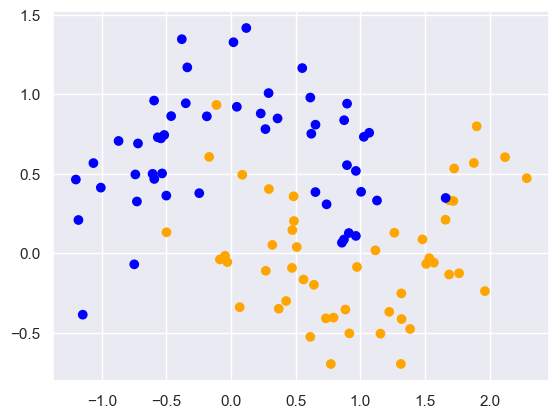

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection  import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.scatter(X[:, 0], X[:, 1], c=["orange" if c==1 else "blue" for c in y])
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

In [5]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

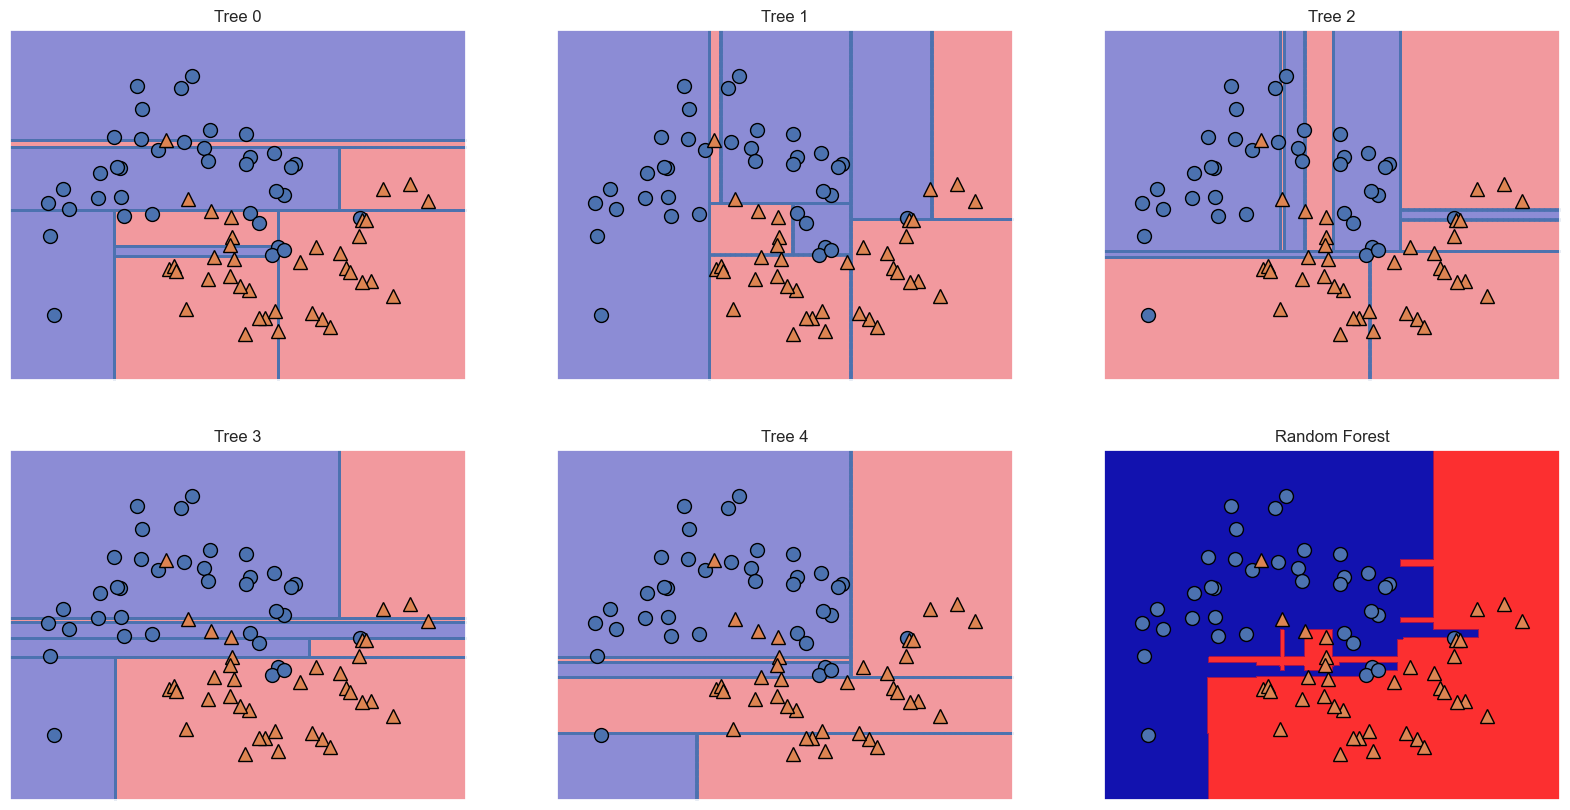

In [6]:
from helpers.plot_interactive_tree import plot_tree_partition
from helpers.plot_2d_separator import plot_2d_separator
from helpers.plot_helpers import discrete_scatter

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    plot_tree_partition(X_train, y_train, tree, ax=ax)
    plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
    
axes[-1, -1].set_title("Random Forest")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(f"Accuracy on training set: {forest.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {forest.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.972


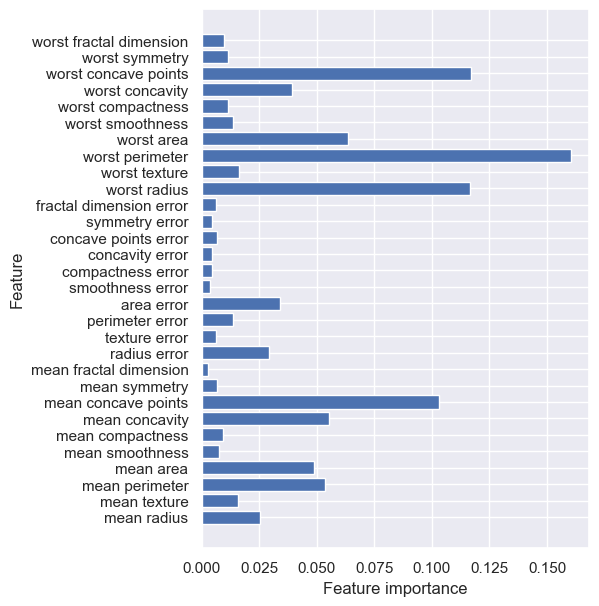

In [8]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(5, 7))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

plot_feature_importances_cancer(forest)

### Strengths, weaknesses, and parameters

- **Random forests for regression and classification are currently among the most widely used machine learning methods.**
- They are:
    - **very powerful**, 
    - often **work well without heavy tuning** of the parameters
    - **don’t require scaling of the data**.
    - Random forests usually work well even on very large datasets, and training can easily be parallelized over many CPU cores within a powerful computer.

The important parameters to adjust are `n_estimators`, `max_features`, and possibly pre-pruning options like `max_depth`.
- `n_estimators`, larger is always better (there are diminishing returns, and more trees need more memory and more time to train.)
- `max_features` determines how random each tree is, and a smaller max_features reduces overfitting (it’s a good rule of thumb to use the default values: `max_features=sqrt(n_features)` for classification and `max_features=n_features` for regression.)
    - It can also drastically reduce space and time requirements for training and prediction.

### Example: Random Forest for Classifying Digits

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

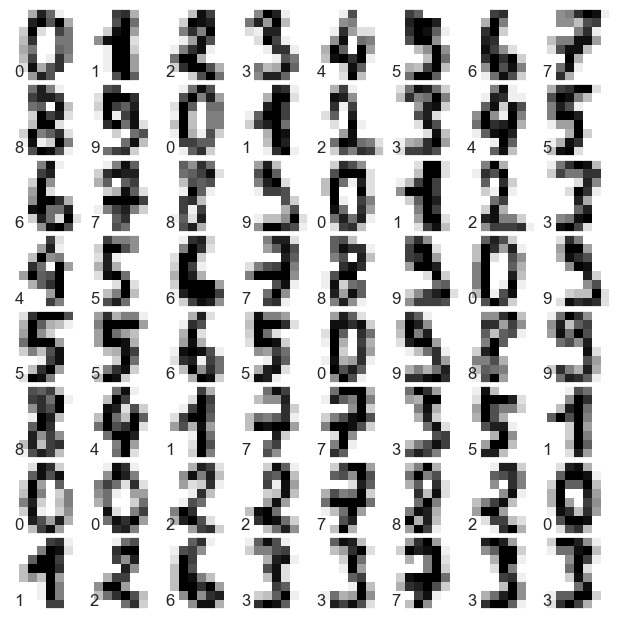

In [10]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [12]:
model.score(Xtest, ytest)

0.9777777777777777

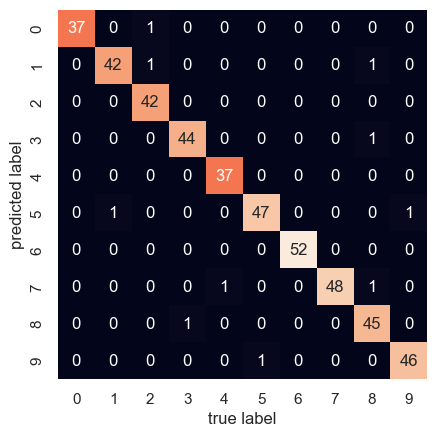

In [13]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

## Random Forest Regression

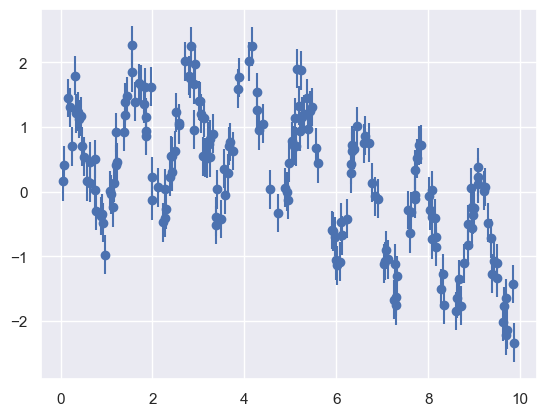

In [14]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');
plt.show()

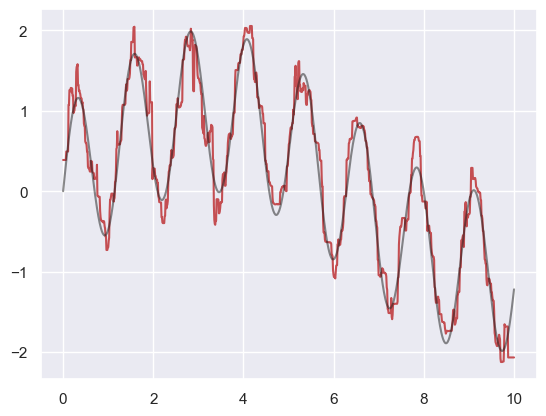

In [16]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

#plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);
plt.show()

## Gradient boosted regression trees (gradient boosting machines)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [18]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [19]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.958


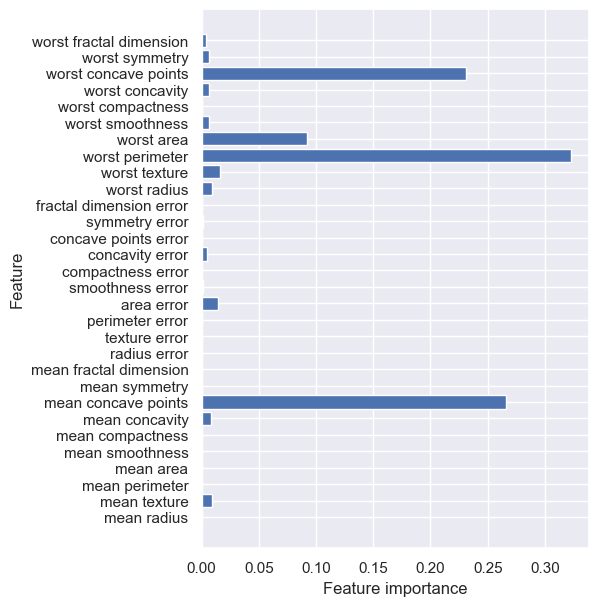

In [20]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### Strengths, weaknesses, and parameters

Strengths:
- Gradient boosted decision trees are among **the most powerful and widely used models for supervised learning**. 
- Similarly to other tree-based models, the algorithm **works well without scaling** and on a mixture of binary and continuous features.
- **Works well on tabular (structured) data**
- Fast

Weaknesses:
- Their main drawback is that they **require careful tuning of the parameters** and may take a long time to train. 
- As with other tree-based models, it also **often does not work well on high-dimensional sparse data**.
- Not racommended for unstructured data (images, audio, text)

The main parameters of gradient boosted tree models are:
- the number of trees, `n_estimators`
- the `learning_rate`, which controls the degree to which each tree is allowed to correct the mistakes of the previous trees. 

These two parameters are highly interconnected, as a lower `learning_rate` means that more trees are needed to build
a model of similar complexity. 

- In contrast to random forests, where a higher `n_estimators` value is always better, increasing `n_estimators` in gradient boosting leads to a more complex model, which may lead to overfitting. 
- A common practice is to fit `n_estimators` depending on the time and memory budget, and then search over different
`learning_rates`.
- Another important parameter is `max_depth` (or alternatively max_leaf_nodes), to reduce the complexity of each tree. 
    - Usually `max_depth` is set very low for gradient boosted models, often not deeper than five splits.